In [1]:

#@title Install Conda Colab
#@markdown This cell will restart kernel / session

!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:11
🔁 Restarting kernel...


In [1]:
# DNABERT Wajib Python 3.6 karena ketergantungan library lama
!conda create -n myenv python=3.6 -y

#@title Install dependencies ke dalam 'myenv'
#@markdown Script ini disesuaikan untuk **DNABERT** (PyTorch, Transformers 2.11).

# 1. Definisikan lokasi PIP dan PYTHON milik environment baru
my_pip = "/usr/local/envs/myenv/bin/pip"
my_python = "/usr/local/envs/myenv/bin/python" # Kita butuh ini untuk run script nanti

print(">>> Memulai instalasi dependencies untuk DNABERT (Python 3.6)...")

# 2. Instalasi PyTorch (Versi Lama yang Kompatibel CUDA Colab)
# Menggunakan PyTorch 1.7.1 yang stabil untuk Transformers 2.x
!$my_pip install -q --no-warn-conflicts torch==1.7.1 torchvision==0.8.2 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

# 3. Instalasi Transformers & Dependencies Inti
# Transformers 2.11.0 adalah syarat mutlak DNABERT
!$my_pip install -q --no-warn-conflicts transformers==2.11.0
!$my_pip install -q --no-warn-conflicts tensorboardX
!$my_pip install -q --no-warn-conflicts protobuf==3.20.0

# 4. Instalasi Numpy & Scipy (Versi Lama)
# Numpy > 1.20 sering error dengan Transformers lama
!$my_pip install -q --no-warn-conflicts numpy==1.19.5
!$my_pip install -q --no-warn-conflicts scipy==1.5.4
!$my_pip install -q --no-warn-conflicts scikit-learn
!$my_pip install -q --no-warn-conflicts pandas matplotlib
!$my_pip install -q --no-warn-conflicts pyahocorasick matplotlib biopython
!$my_pip install -q --no-warn-conflicts statsmodels

# 5. Instalasi Bioinformatika
!$my_pip install -q --no-warn-conflicts biopython
!$my_pip install -q --no-warn-conflicts weblogo # Wajib untuk visualisasi motif

print("\n>>> ✅ Instalasi ke dalam 'myenv' selesai.")

Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/myenv

  added / updated specs:
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2026.1.4   |       hbd8a1cb_0         143 KB  conda-forge
    icu-78.2                   |       h33c6efd_0        12.1 MB  conda-forge
    ld_impl_linux-64-2.45      |default_hbd61a6d_105         714 KB  conda-forge
    libffi-3.4.6               |       h2dba641_1          56 KB  conda-forge
    libgcc-15.2.0              |      he0feb66_16        1018 KB  conda-forge
    libgcc-ng-15.2.0           |      h69a702a_16          27 KB  conda-forge
   

In [2]:
# CELL: Setup DNABERT & Download Model (Flexible Version)
import os

# @markdown ### Pilih Versi K-mer DNABERT
# @markdown Pilih ukuran K-mer (3, 4, 5, atau 6). Default paper adalah 6.
kmer_version = "3" # @param ["3", "4", "5", "6"]

# Nama model sesuai repo Hugging Face zhihan1996
model_name = f"DNA_bert_{kmer_version}"
repo_url = f"https://huggingface.co/zhihan1996/{model_name}"
model_path = f"/content/DNABERT/{model_name}"

print(f">>> Anda memilih: {model_name}")

# 1. Clone DNABERT Repository (Main Code)
if not os.path.exists('/content/DNABERT'):
    print(">>> Cloning DNABERT Main Repository...")
    !git clone https://github.com/jerryji1993/DNABERT
else:
    print(">>> DNABERT Repository sudah ada.")

# 2. Install Package DNABERT ke dalam myenv
# Pastikan my_pip terdefinisi (jika cell ini dijalankan terpisah)
my_pip = "/usr/local/envs/myenv/bin/pip"
if not os.path.exists(my_pip):
     print("⚠️ Warning: myenv belum dibuat? Pastikan environment sudah setup.")
else:
    print(">>> Menginstall DNABERT package...")
    %cd /content/DNABERT
    !$my_pip install --editable .

# 3. Download Model Spesifik dari Hugging Face
# Install git-lfs untuk handle file model besar
!git lfs install > /dev/null

if not os.path.exists(model_path):
    print(f">>> Downloading {model_name} from HuggingFace...")
    # Clone hanya model yang dipilih
    !git clone $repo_url
else:
    print(f">>> Model {model_name} sudah ada di folder.")

print("\n>>> Cek isi folder model:")
!ls -lh $model_path

# Simpan path model ke variabel environment agar bisa dipakai cell lain (opsional)
os.environ['CHOSEN_MODEL_PATH'] = model_path
os.environ['CHOSEN_KMER'] = kmer_version
print(f"\n✅ SIAP! Path model: {model_path}")

>>> Anda memilih: DNA_bert_3
>>> Cloning DNABERT Main Repository...
Cloning into 'DNABERT'...
remote: Enumerating objects: 781, done.
remote: Counting objects: 100% (781/781), done.
remote: Compressing objects: 100% (350/350), done.
remote: Total 781 (delta 422), reused 722 (delta 408), pack-reused 0 (from 0)
Receiving objects: 100% (781/781), 11.66 MiB | 13.18 MiB/s, done.
Resolving deltas: 100% (422/422), done.
>>> Menginstall DNABERT package...
/content/DNABERT
Obtaining file:///content/DNABERT
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 3.8 MB 7.3 MB/s            
     |████████████████████████████████| 132 kB 61.9 MB/s            
     |████████████████████████████████| 8.8 MB 69.4 MB/s            
     |████████████████████████████████| 79 kB 12.1 MB/s            
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.7.0
    Uninstalling tokenizers-0.7.0:
      Successfully uninstalled tokenizers-0.7.0
  Attempting u

In [3]:
#@title Generate Dummy Data (Flexible)
import random
import os

#@markdown ### 📝 Konfigurasi Data
#@markdown Tentukan jumlah sampel untuk Training dan Dev (Validasi).

num_train_samples = 500 #@param {type:"integer"}
num_dev_samples = 100 #@param {type:"integer"}

#@markdown ### 🧬 Konfigurasi Sekuens
#@markdown Sesuaikan **K-mer** dengan model yang Anda pilih sebelumnya (3-6).
kmer_size = "3" #@param ["3", "4", "5", "6"]
sequence_length = 100 #@param {type:"integer"}

# Konversi parameter
k = int(kmer_size)

# Fungsi seq2kmer dinamis
def seq2kmer(seq, k):
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    return " ".join(kmer)

# Lokasi Data
data_dir = "/content/DNABERT/examples/sample_data/my_binary_task"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Fungsi Generate Data
def generate_data(filename, n_samples, k, seq_len):
    print(f"Generating {n_samples} lines to {os.path.basename(filename)} with K={k}...")
    with open(filename, 'w') as f:
        f.write("sequence\tlabel\n") # Header wajib DNABERT
        for _ in range(n_samples):
            bases = ['A','C','G','T']
            # Buat random DNA sequence
            seq = "".join([random.choice(bases) for _ in range(seq_len)])

            # Random label (0 atau 1)
            label = random.choice([0, 1])

            # Convert ke format K-mer
            kmer_seq = seq2kmer(seq, k)

            f.write(f"{kmer_seq}\t{label}\n")

# Eksekusi
print(f">>> Memulai Generasi Data (K-mer: {k})...")
generate_data(os.path.join(data_dir, "train.tsv"), num_train_samples, k, sequence_length)
generate_data(os.path.join(data_dir, "dev.tsv"), num_dev_samples, k, sequence_length)

print(f"\n✅ Data siap di: {data_dir}")
print(f"- train.tsv: {num_train_samples} baris")
print(f"- dev.tsv: {num_dev_samples} baris")
print(f"- K-mer size: {k}")

>>> Memulai Generasi Data (K-mer: 3)...
Generating 500 lines to train.tsv with K=3...
Generating 100 lines to dev.tsv with K=3...

✅ Data siap di: /content/DNABERT/examples/sample_data/my_binary_task
- train.tsv: 500 baris
- dev.tsv: 100 baris
- K-mer size: 3


In [4]:
#@title 🛠️ Fix System Dependencies & Re-install PyTorch (Combined)
#@markdown ### 🔧 Perbaikan Environment Otomatis
#@markdown Script ini melakukan dua langkah perbaikan vital:
#@markdown 1. **Fix Libtinfo:** Memperbaiki error `libtinfo.so.5 missing` dengan membuat symlink ke library sistem yang ada.
#@markdown 2. **Fix PyTorch/CUDA:** Menginstall ulang PyTorch versi `1.7.1+cu110` agar kompatibel dengan GPU Tesla T4 di Google Colab.

import os
import sys

# Tentukan path environment khusus kita
my_pip = "/usr/local/envs/myenv/bin/pip"
my_python = "/usr/local/envs/myenv/bin/python"

print("="*50)
print(">>> TAHAP 1: MEMPERBAIKI SYSTEM LIBRARIES (libtinfo)")
print("="*50)

# 1. Update dan Install paket legacy
!apt-get update -q
!apt-get install -y libncurses5 libncursesw5

# 2. Buat Symlink Manual (Trik agar sistem membaca libtinfo.so.6 sebagai so.5)
# Ini solusi standar untuk error 'libtinfo.so.5: cannot open shared object file'
if os.path.exists("/usr/lib/x86_64-linux-gnu/libtinfo.so.6"):
    !ln -sf /usr/lib/x86_64-linux-gnu/libtinfo.so.6 /usr/lib/x86_64-linux-gnu/libtinfo.so.5
    !ln -sf /usr/lib/x86_64-linux-gnu/libtinfo.so.6 /usr/lib/x86_64-linux-gnu/libtinfo.so
    print("✅ Symlink libtinfo berhasil dibuat.")
else:
    print("⚠️ Warning: libtinfo.so.6 tidak ditemukan, mencoba lanjut...")


print("\n" + "="*50)
print(">>> TAHAP 2: RE-INSTALL PYTORCH (CUDA 11.0)")
print("="*50)

# 3. Uninstall PyTorch versi bawaan/conda yang mungkin rusak/tidak kompatibel
print(">>> Uninstalling faulty PyTorch versions...")
!$my_pip uninstall -y torch torchvision torchaudio

# 4. Install PyTorch Spesifik (CUDA 11.0)
# Versi ini paling stabil untuk environment DNABERT lama di Colab
print(">>> Installing PyTorch 1.7.1 + CUDA 11.0...")
!$my_pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

# 5. Verifikasi Akhir
print("\n" + "="*50)
print(">>> VERIFIKASI GPU DALAM ENVIRONMENT")
print("="*50)

cmd = f'{my_python} -c "import torch; print(\'Versi PyTorch:\', torch.__version__); print(\'GPU Available:\', torch.cuda.is_available()); print(\'Device Name:\', torch.cuda.get_device_name(0) if torch.cuda.is_available() else \'None\')"'
!{cmd}

print("\n✅ SELESAI. Jika 'GPU Available' bernilai True, Anda siap lanjut ke Training.")

>>> TAHAP 1: MEMPERBAIKI SYSTEM LIBRARIES (libtinfo)
Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://cli.github.com/packages stable/main amd64 Packages [345 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,297 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http

In [5]:
#@title 🚀 Run Training (Fine-Tuning)
#@markdown Script ini otomatis menggunakan K-mer dan Model yang sudah Anda pilih sebelumnya.

import os
import sys

# Pindah ke direktori kerja script
%cd /content/DNABERT/examples

# 1. Setup Environment & Path
my_python = "/usr/local/envs/myenv/bin/python"

# Ambil konfigurasi dari Environment Variables (diset di langkah sebelumnya)
# Jika tidak ada, default ke K-mer 6
kmer_size = os.environ.get("CHOSEN_KMER", "6")
model_path = os.environ.get("CHOSEN_MODEL_PATH", "/content/DNABERT/DNA_bert_6")
tokenizer_name = f"dna{kmer_size}"

# Gunakan Absolute Path agar aman
data_dir = os.path.abspath("./sample_data/my_binary_task")
output_dir = os.path.abspath("./ft/my_binary_result")

# 2. Validasi Ketersediaan Model
if not os.path.exists(model_path):
    print(f"❌ Error: Folder model tidak ditemukan di {model_path}")
    print("Pastikan Anda sudah menjalankan Cell 'Setup DNABERT & Download Model' sebelumnya.")
else:
    print("="*40)
    print(f"⚙️  TRAINING CONFIGURATION")
    print("="*40)
    print(f"🔹 K-mer Size      : {kmer_size}")
    print(f"🔹 Tokenizer       : {tokenizer_name}")
    print(f"🔹 Pretrained Model: {model_path}")
    print(f"🔹 Data Dir        : {data_dir}")
    print(f"🔹 Output Dir      : {output_dir}")
    print("="*40)

    # 3. Susun Command Training
    # Perhatikan parameter --tokenizer_name dan --model_name_or_path yang dinamis
    cmd = f"""
    {my_python} run_finetune.py \
        --model_type dna \
        --tokenizer_name {tokenizer_name} \
        --model_name_or_path "{model_path}" \
        --task_name dnaprom \
        --do_train \
        --do_eval \
        --data_dir "{data_dir}" \
        --max_seq_length 100 \
        --per_gpu_eval_batch_size=16 \
        --per_gpu_train_batch_size=16 \
        --learning_rate 2e-4 \
        --num_train_epochs 3.0 \
        --output_dir "{output_dir}" \
        --evaluate_during_training \
        --logging_steps 10 \
        --save_steps 100 \
        --warmup_percent 0.1 \
        --hidden_dropout_prob 0.1 \
        --overwrite_output \
        --n_process 2
    """

    print("\n>>> Memulai Training... (Silakan tunggu, proses ini memakan waktu)")

    # Eksekusi
    !{cmd}

/content/DNABERT/examples
⚙️  TRAINING CONFIGURATION
🔹 K-mer Size      : 3
🔹 Tokenizer       : dna3
🔹 Pretrained Model: /content/DNABERT/DNA_bert_3
🔹 Data Dir        : /content/DNABERT/examples/sample_data/my_binary_task
🔹 Output Dir      : /content/DNABERT/examples/ft/my_binary_result

>>> Memulai Training... (Silakan tunggu, proses ini memakan waktu)
01/14/2026 06:23:34 - WARNING - __main__ -   Process rank: -1, device: cuda, n_gpu: 1, distributed training: False, 16-bits training: False
01/14/2026 06:23:34 - INFO - transformers.configuration_utils -   loading configuration file /content/DNABERT/DNA_bert_3/config.json
01/14/2026 06:23:34 - INFO - transformers.configuration_utils -   Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "auto_map": {
    "AutoConfig": "configuration_bert.BertConfig",
    "AutoModel": "dnabert_layer.BertModel",
    "AutoModelForMaskedLM": "dnabert_layer.BertForMaskedLM",
    "AutoModelForPreT

In [7]:
#@title 🔮 Run Prediction & Attention (Flexible)
#@markdown Script ini melakukan prediksi dan menghasilkan **Attention Scores** (`atten.npy`) yang dibutuhkan untuk pencarian motif.
#@markdown Otomatis menyesuaikan dengan K-mer yang dipilih sebelumnya.

import os
import sys

# Pindah ke direktori kerja
%cd /content/DNABERT/examples

# 1. Setup Environment & Path
my_python = "/usr/local/envs/myenv/bin/python"

# Ambil konfigurasi K-mer dari environment (default ke "6" jika tidak ada)
kmer_size = os.environ.get("CHOSEN_KMER", "6")
tokenizer_name = f"dna{kmer_size}"

# Path Folder
# Model yang digunakan adalah hasil Fine-Tuning dari langkah sebelumnya
trained_model_dir = os.path.abspath("./ft/my_binary_result")
data_dir = os.path.abspath("./sample_data/my_binary_task")
output_dir = os.path.abspath("./ft/my_binary_result") # Hasil prediksi disimpan di folder yang sama

print("="*50)
print(f"⚙️  PREDICTION CONFIGURATION")
print("="*50)
print(f"🔹 K-mer Size      : {kmer_size}")
print(f"🔹 Tokenizer       : {tokenizer_name}")
print(f"🔹 Model Source    : {trained_model_dir}")
print("="*50)

print("\n>>> Memulai Prediksi & Visualisasi (Generate atten.npy)...")

# 2. Susun Command
# Penting: --do_visualize wajib ada untuk langkah Motif Discovery
cmd = f"""
{my_python} run_finetune.py \
    --model_type dna \
    --tokenizer_name={tokenizer_name} \
    --model_name_or_path "{trained_model_dir}" \
    --task_name dnaprom \
    --do_predict \
    --do_visualize \
    --data_dir "{data_dir}" \
    --max_seq_length 100 \
    --per_gpu_eval_batch_size=32 \
    --output_dir "{output_dir}" \
    --predict_dir "{output_dir}" \
    --n_process 2
"""

# 3. Eksekusi
!{cmd}

# 4. Verifikasi Output
print("\n" + "="*50)
print(">>> VERIFIKASI FILE HASIL")
print("="*50)

atten_file = os.path.join(output_dir, "atten.npy")
pred_file = os.path.join(output_dir, "pred_results.npy")

if os.path.exists(atten_file) and os.path.exists(pred_file):
    print(f"✅ SUKSES: File Attention ditemukan di: {atten_file}")
    print(f"✅ SUKSES: File Prediksi ditemukan di: {pred_file}")
    print("👉 Anda siap lanjut ke Tahap 7 (Motif Discovery).")
else:
    print(f"❌ GAGAL: Salah satu file output tidak ditemukan di {output_dir}")
    print("Cek log error di atas.")

/content/DNABERT/examples
⚙️  PREDICTION CONFIGURATION
🔹 K-mer Size      : 3
🔹 Tokenizer       : dna3
🔹 Model Source    : /content/DNABERT/examples/ft/my_binary_result

>>> Memulai Prediksi & Visualisasi (Generate atten.npy)...
01/14/2026 06:25:05 - WARNING - __main__ -   Process rank: -1, device: cuda, n_gpu: 1, distributed training: False, 16-bits training: False
<class 'transformers.tokenization_dna.DNATokenizer'>
01/14/2026 06:25:05 - INFO - transformers.tokenization_utils -   Model name '/content/DNABERT/examples/ft/my_binary_result' not found in model shortcut name list (dna3, dna4, dna5, dna6). Assuming '/content/DNABERT/examples/ft/my_binary_result' is a path, a model identifier, or url to a directory containing tokenizer files.
01/14/2026 06:25:05 - INFO - transformers.tokenization_utils -   Didn't find file /content/DNABERT/examples/ft/my_binary_result/added_tokens.json. We won't load it.
01/14/2026 06:25:05 - INFO - transformers.tokenization_utils -   loading file /content/D

In [8]:
#@title 🧬 Run Motif Discovery (Fix Dependencies)
#@markdown Script ini mencari pola DNA (motif) penting berdasarkan Attention Scores dari langkah prediksi.
#@markdown
#@markdown **Catatan:** Script ini otomatis menginstall library tambahan (`statsmodels`, `pyahocorasick`) yang dibutuhkan.

import os
import sys

# 2. Setup Path & Environment
%cd /content/DNABERT/motif
my_python = "/usr/local/envs/myenv/bin/python"

# Path Data & Hasil Prediksi (Konsisten dengan cell sebelumnya)
data_dir = os.path.abspath("/content/DNABERT/examples/sample_data/my_binary_task")
predict_dir = os.path.abspath("/content/DNABERT/examples/ft/my_binary_result")

# Path Output Motif
motif_dir = os.path.abspath("./found_motifs_result")
if not os.path.exists(motif_dir):
    os.makedirs(motif_dir)

# 3. Konfigurasi Parameter Motif
# Jika menggunakan data dummy/sedikit, pval_cutoff 0.1 mungkin terlalu ketat.
# Anda bisa mengubahnya ke 1.0 jika hasil output kosong.
pval_cutoff = 0.1

print("="*50)
print(f"🔎 MOTIF DISCOVERY CONFIGURATION")
print("="*50)
print(f"🔹 Data Source   : {data_dir}")
print(f"🔹 Attention Src : {predict_dir}")
print(f"🔹 Output Dir    : {motif_dir}")
print(f"🔹 P-Value Cutoff: {pval_cutoff}")
print("="*50)

# 4. Eksekusi Pencarian Motif
print("\n>>> Menjalankan algoritma pencarian motif...")

cmd = f"""
{my_python} find_motifs.py \
    --data_dir "{data_dir}" \
    --predict_dir "{predict_dir}" \
    --window_size 24 \
    --min_len 5 \
    --pval_cutoff {pval_cutoff} \
    --min_n_motif 1 \
    --align_all_ties \
    --save_file_dir "{motif_dir}" \
    --verbose
"""

!{cmd}

# 5. Cek Hasil
print("\n" + "="*50)
import glob
files = glob.glob(f"{motif_dir}/*.txt")
if len(files) > 0:
    print(f"✅ SUKSES: Ditemukan {len(files)} motif.")
    print(f"Cek folder: {motif_dir}")
else:
    print("⚠️  HASIL KOSONG: Tidak ada motif yang lolos filter statistik.")
    print("Saran: Jika Anda menggunakan 'Dummy Data', coba ubah '--pval_cutoff 0.1' menjadi '1.0' di script di atas untuk melihat hasil tanpa filter.")

/content/DNABERT/motif
🔎 MOTIF DISCOVERY CONFIGURATION
🔹 Data Source   : /content/DNABERT/examples/sample_data/my_binary_task
🔹 Attention Src : /content/DNABERT/examples/ft/my_binary_result
🔹 Output Dir    : /content/DNABERT/motif/found_motifs_result
🔹 P-Value Cutoff: 0.1

>>> Menjalankan algoritma pencarian motif...
*** Begin motif analysis ***
* pos_seqs: 56; neg_seqs: 44
* Finding high attention motif regions
* Filtering motifs by hypergeometric test
* Merging similar motif instances
* Making fixed_length window = 24
* Removing motifs with less than 1 instances
* Saving outputs to directory

⚠️  HASIL KOSONG: Tidak ada motif yang lolos filter statistik.
Saran: Jika Anda menggunakan 'Dummy Data', coba ubah '--pval_cutoff 0.1' menjadi '1.0' di script di atas untuk melihat hasil tanpa filter.


In [9]:
#@title 🔬 Force Motif Output (Relaxed Mode)
#@markdown ### Gunakan Cell ini jika Cell 7 kosong!
#@markdown Jika Anda menggunakan **Dummy Data**, hampir pasti motif tidak akan lolos uji statistik (P-value < 0.05).
#@markdown Cell ini mengubah `pval_cutoff` menjadi **1.0** (loloskan semua) agar Anda tetap bisa melihat hasil analisis pola DNA.

import os
import glob
import sys

# 1. Setup Path & Environment
%cd /content/DNABERT/motif
my_python = "/usr/local/envs/myenv/bin/python"

data_dir = os.path.abspath("/content/DNABERT/examples/sample_data/my_binary_task")
predict_dir = os.path.abspath("/content/DNABERT/examples/ft/my_binary_result")

# Folder output khusus "Relaxed" agar tidak tercampur
motif_dir = os.path.abspath("./found_motifs_result_relaxed")

if not os.path.exists(motif_dir):
    os.makedirs(motif_dir)

print("="*50)
print(f"⚠️  FORCING MOTIF DISCOVERY (P-Value = 1.0)")
print("="*50)
print("Tujuan: Melihat pola apa saja yang diperhatikan model,")
print("meskipun secara statistik belum tentu signifikan (karena data sedikit).")
print("-" * 50)

# 2. Jalankan Perintah (Relaxed)
# Note: window_size 24 adalah default DNABERT
cmd = f"""
{my_python} find_motifs.py \
    --data_dir "{data_dir}" \
    --predict_dir "{predict_dir}" \
    --window_size 24 \
    --min_len 5 \
    --pval_cutoff 1.0 \
    --min_n_motif 1 \
    --align_all_ties \
    --save_file_dir "{motif_dir}" \
    --verbose
"""

# Menjalankan command
# Kita mengabaikan error visualisasi (HTTP 308) karena kita hanya butuh file teksnya
try:
    !{cmd}
except:
    pass

# 3. Cek & Baca Hasil
print("\n" + "="*50)
print(">>> ANALISIS HASIL (RELAXED)")
print("="*50)

files = glob.glob(f"{motif_dir}/*.txt")

if len(files) > 0:
    print(f"✅ SUKSES: Ditemukan {len(files)} motif kandidat.")
    print(f"📁 Lokasi: {motif_dir}")

    # Tampilkan isi file pertama sebagai contoh
    sample_file = files[0]
    print(f"\n📄 Contoh Isi File ({os.path.basename(sample_file)}):")
    print("-" * 20)
    with open(sample_file, 'r') as f:
        # Baca 5 baris pertama saja agar tidak memenuhkan layar
        print("".join(f.readlines()[:10]))
    print("...")
    print("-" * 20)
    print("👉 Anda bisa lanjut ke Cell 9 untuk memvisualisasikan motif ini.")
else:
    print("❌ GAGAL: Masih tidak ada motif yang ditemukan.")
    print("Cek apakah file 'atten.npy' benar-benar ada di folder prediction.")

/content/DNABERT/motif
⚠️  FORCING MOTIF DISCOVERY (P-Value = 1.0)
Tujuan: Melihat pola apa saja yang diperhatikan model,
meskipun secara statistik belum tentu signifikan (karena data sedikit).
--------------------------------------------------
*** Begin motif analysis ***
* pos_seqs: 56; neg_seqs: 44
* Finding high attention motif regions
* Filtering motifs by hypergeometric test
* Merging similar motif instances
* Making fixed_length window = 24
* Removing motifs with less than 1 instances
* Saving outputs to directory
Traceback (most recent call last):
  File "find_motifs.py", line 110, in <module>
    main()
  File "find_motifs.py", line 106, in main
    return_idx  = args.return_idx
  File "/content/DNABERT/motif/motif_utils.py", line 551, in motif_analysis
    show_fineprint=False, show_ends=False, color_scheme='color_classic')
  File "/usr/local/envs/myenv/lib/python3.6/site-packages/Bio/motifs/__init__.py", line 534, in weblogo
    response = urlopen(req)
  File "/usr/local/env

>>> Memeriksa library Visualisasi...
   Menginstall logomaker (ini mungkin memakan waktu sebentar)...
✅ Library siap.
✅ SUMBER DATA: Ditemukan 1 motif di folder: found_motifs_result_relaxed

🎨 [1/1] Memproses: motif_GTAGT_1.txt


/tmp/ipython-input-3951055419.py:65: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  counts_df = pd.DataFrame(index=df.columns, columns=['A', 'C', 'G', 'T']).fillna(0)


<Figure size 1000x300 with 0 Axes>

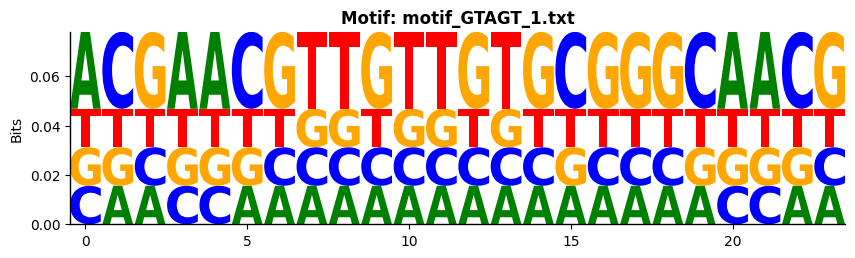


🏁 SELESAI. Pipeline Analisis Motif DNABERT telah rampung.


In [10]:
#@title 📊 Visualisasi Motif DNA (Final)
#@markdown Script ini akan membaca file motif (.txt), mengubahnya menjadi matriks probabilitas, dan menggambar **Sequence Logo**.

import os
import sys
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 1. Install Library Logomaker (Silent Install)
print(">>> Memeriksa library Visualisasi...")
try:
    import logomaker
except ImportError:
    print("   Menginstall logomaker (ini mungkin memakan waktu sebentar)...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "logomaker"])
    import logomaker
print("✅ Library siap.")

# 2. Tentukan Direktori Sumber (Auto-Switch)
# Kita cek folder normal dulu, kalau kosong baru ke folder relaxed
path_normal = os.path.abspath("/content/DNABERT/motif/found_motifs_result")
path_relaxed = os.path.abspath("/content/DNABERT/motif/found_motifs_result_relaxed")

target_dir = path_normal
files = glob.glob(f"{target_dir}/*.txt")

if len(files) == 0:
    target_dir = path_relaxed
    files = glob.glob(f"{target_dir}/*.txt")

if len(files) == 0:
    print(f"❌ GAGAL: Tidak ditemukan file motif (.txt) baik di '{path_normal}' maupun '{path_relaxed}'.")
    print("   Pastikan Anda sudah menjalankan Cell 7 atau Cell 8.")
else:
    print(f"✅ SUMBER DATA: Ditemukan {len(files)} motif di folder: {os.path.basename(target_dir)}")

    # Batasi visualisasi maksimal 5 motif agar tidak terlalu banyak gambar
    max_display = 5
    files_to_process = files[:max_display]

    for i, target_file in enumerate(files_to_process):
        print(f"\n🎨 [{i+1}/{len(files_to_process)}] Memproses: {os.path.basename(target_file)}")

        # 3. Baca Sequence
        with open(target_file, "r") as f:
            seqs = [line.strip() for line in f if line.strip()]

        if not seqs:
            print("   ⚠️ File kosong, dilewati.")
            continue

        # 4. Data Processing (Sequence -> Matrix)
        # Kita asumsikan window size 24 (default DNABERT)
        WINDOW_SIZE = 24
        matrix_list = []
        for seq in seqs:
            if len(seq) == WINDOW_SIZE:
                matrix_list.append(list(seq))

        if len(matrix_list) > 0:
            # Buat DataFrame hitungan
            df = pd.DataFrame(matrix_list, columns=list(range(WINDOW_SIZE)))
            counts_df = pd.DataFrame(index=df.columns, columns=['A', 'C', 'G', 'T']).fillna(0)

            for col in df.columns:
                val_counts = df[col].value_counts()
                for base in ['A', 'C', 'G', 'T']:
                    if base in val_counts:
                        counts_df.loc[col, base] = val_counts[base]

            # Transformasi ke Bits (Information Content)
            info_mat = logomaker.transform_matrix(counts_df, from_type='counts', to_type='information')

            # 5. Plotting
            plt.figure(figsize=(10, 3))

            # Style Logo
            logo = logomaker.Logo(info_mat,
                                 shade_below=.5,
                                 fade_below=.5,
                                 font_name='sans-serif') # Font aman

            logo.style_spines(visible=False)
            logo.style_spines(spines=['left', 'bottom'], visible=True)
            logo.ax.set_ylabel('Bits', fontsize=10)
            logo.ax.set_title(f"Motif: {os.path.basename(target_file)}", fontsize=12, fontweight='bold')

            # Tampilkan label X axis setiap 5 posisi agar rapi
            plt.xticks(range(0, WINDOW_SIZE, 5))

            plt.show()
        else:
            print(f"   ⚠️ Panjang sequence tidak konsisten (bukan {WINDOW_SIZE}bp).")

    if len(files) > max_display:
        print(f"\nℹ️  ... dan {len(files) - max_display} motif lainnya tidak ditampilkan.")

print("\n🏁 SELESAI. Pipeline Analisis Motif DNABERT telah rampung.")